In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Churn_modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.duplicated().sum()

np.int64(0)

C:\Users\mruna\AppData\Local\Temp\ipykernel_17240\777329580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


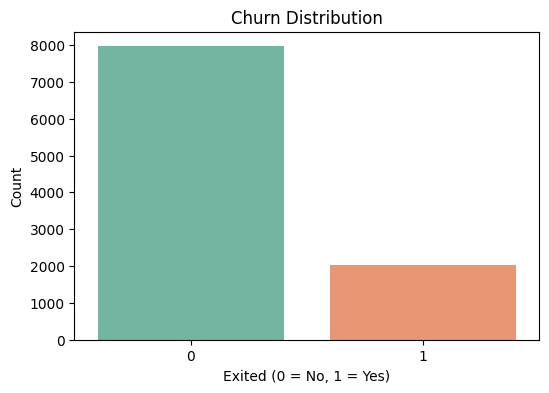

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


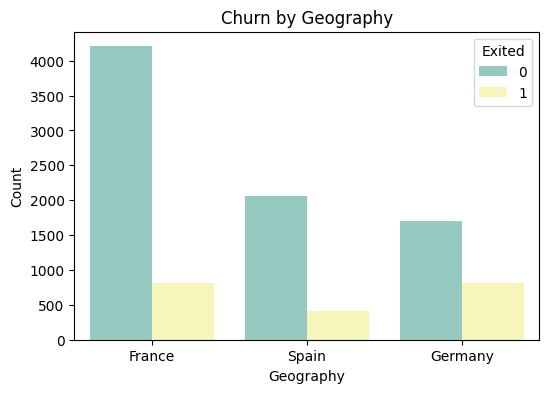

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Geography', hue='Exited', data=df, palette='Set3')
plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()


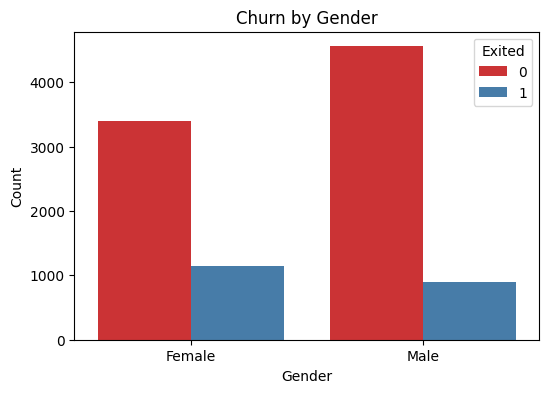

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set1')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape


(8000, 11)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
s=StandardScaler()

In [23]:
X_train_s=s.fit_transform(X_train)

In [24]:
X_test_s=s.transform(X_test)

In [25]:
X_train_s

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]], shape=(8000, 11))

In [26]:
import tensorflow

In [27]:
from tensorflow import keras

In [28]:
from tensorflow.keras import Sequential

In [29]:
from tensorflow.keras.layers import Dense

In [30]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\mruna\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 3)             │           36 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │            4 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [33]:
model.fit(X_train_s,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5298
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4825
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4605
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4476
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4395
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4344
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4311
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4290
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4276
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4264


In [34]:
model.layers[0].get_weights()

[array([[-0.19806427,  0.18013096, -0.12182711],
        [ 1.6860378 , -0.81813985, -0.8903776 ],
        [ 0.21368842,  0.25880465,  0.0898496 ],
        [ 0.31734374,  0.08910766, -0.42004842],
        [ 0.06828246,  0.34759006, -0.01831476],
        [ 0.07522284, -0.3496006 ,  0.46842843],
        [-0.22864544,  0.6537231 ,  0.6315164 ],
        [-0.1033683 , -0.17213684,  0.00660504],
        [ 0.5954904 , -0.6488254 , -0.11887246],
        [-0.09237943, -0.49663553,  0.3640651 ],
        [-0.30428472,  0.62616044,  0.05521192]], dtype=float32),
 array([-0.28560528,  0.4005023 ,  0.33712515], dtype=float32)]

In [35]:
model.layers[1].get_weights()

[array([[ 0.99600273],
        [-1.5591172 ],
        [-1.4587705 ]], dtype=float32),
 array([-0.30287632], dtype=float32)]

In [36]:
model.predict(X_test_s)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.23769833],
       [0.35359448],
       [0.16945674],
       ...,
       [0.17869832],
       [0.12663183],
       [0.21960509]], shape=(2000, 1), dtype=float32)

In [37]:
y_log=model.predict(X_test_s)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
y_pred=np.where(y_log>0.5,1,0)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.813